<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/Submission%2002/Submission%2002%20-%20Delhi%20Weather%20-%20Time%20Series%20%5BFix%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission 02 - Delhi Weather Data - Time Series**
### **Nur Imam Masri**
### **nurimammasri.01@gmail.com**

**Tips n Tricks**

* Penggunaan Layer Conv1D dan LSTM
* Shuffle = False
* Urutkan data berdasarkan date
* fillna mean() --> silahkan coba lihat data yg lain
* tf.keras.layers.Lambda



In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Cond1D(filters=32. kernel size=5
#                            stides=1, padding="causal",
#                            activation="relu", input_shape[None, 1]),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(30, activation="relu"),
#     tf.keras.layers.Dense(10, activation="relu"),
#     tf.keras.layers.Dense(1),
#     tf.keras.layers.Lamda(lambda x: x*400)
# ])

* LerningRate Scheduler

In [ ]:
# learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch/20)
# )
# optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
plt.style.use('seaborn')

# **Data Loading**

**Delhi Weather Data**

[Delhi Weather Data](https://www.kaggle.com/mahirkukreja/delhi-weather-data)

**Context**

This dataset contains weather data for New Delhi, India.

**Content**

This data was taken out from wunderground with the help of their easy to use api.
It contains various features such as temperature, pressure, humidity, rain, precipitation,etc.

Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* testset.csv

**use kaggle API**

**Download dataset from Kaggle**

In [ ]:
# # install kaggle package
# !pip install -q kaggle

In [ ]:
# # upload kaggle.json
# from google.colab import files
# files.upload()

In [ ]:
# # make directory and change permission
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [ ]:
# # test kaggle dataset list
# !kaggle datasets list

In [ ]:
# # download dataset, choose 'copy api command' from kaggle dataset
# !kaggle datasets download -d mahirkukreja/delhi-weather-data

In [ ]:
# # unzip
# !mkdir delhi-weather-data
# !unzip delhi-weather-data.zip -d delhi-weather-data
# !ls delhi-weather-data

In [ ]:
# import pandas as pd
# df_weather = pd.read_csv('delhi-weather-data/testset.csv')
# df_weather.head()

**use by link**

In [ ]:
import pandas as pd
df_weather = pd.read_csv('https://drive.google.com/uc?id=1DJKQoYl1FDhp7eL2gz55wxYz0WBmIzrj')
df_weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


**use by Github**

In [1]:
import pandas as pd
# testset.csv
df_weather = pd.read_csv('https://github.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/raw/main/Submission%2002/testset.csv')
df_weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


**Modify Column**

In [ ]:
df_weather.columns = [column.strip().replace('_', '') for column in df_weather.columns]

In [ ]:
df_weather.head(2)

,datetimeutc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


**Min Max**

In [ ]:
df_weather.min()

datetimeutc    19961101-11:00
dewptm                    -24
fog                         0
hail                        0
heatindexm               26.8
hum                         4
precipm                   NaN
pressurem               -9999
rain                        0
snow                        0
tempm                       1
thunder                     0
tornado                     0
vism                        0
wdird                       0
wgustm                   25.9
windchillm                2.1
wspdm                       0
dtype: object

In [ ]:
df_weather.max()

datetimeutc    20170424-18:00
dewptm                     75
fog                         1
hail                        1
heatindexm               73.6
hum                       243
precipm                   NaN
pressurem         1.01061e+08
rain                        1
snow                        1
tempm                      90
thunder                     1
tornado                     1
vism                     6436
wdird                     960
wgustm                   92.6
windchillm                7.3
wspdm                  1514.9
dtype: object

Menampilkan daftar columns

In [ ]:
df_weather.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

Ada 100990 baris data yang berarti ada 100990 per datetime

20 kolom yang berarti 20 columns (Features), Namun yang akan digunakan dalam kasus ini hanya untuk datetime dan temperature

In [ ]:
# the shape of data
print('Total Row:', df_weather.shape[0])
print('Total Columns:', df_weather.shape[1])
df_weather.shape

Total Row: 100990
Total Columns: 20


(100990, 20)

Melihat keseluruhan profile data, dapat dilihat terdapat data null pada banyak features.

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetimeutc  100990 non-null  object 
 1   conds        100918 non-null  object 
 2   dewptm       100369 non-null  float64
 3   fog          100990 non-null  int64  
 4   hail         100990 non-null  int64  
 5   heatindexm   29155 non-null   float64
 6   hum          100233 non-null  float64
 7   precipm      0 non-null       float64
 8   pressurem    100758 non-null  float64
 9   rain         100990 non-null  int64  
 10  snow         100990 non-null  int64  
 11  tempm        100317 non-null  float64
 12  thunder      100990 non-null  int64  
 13  tornado      100990 non-null  int64  
 14  vism         96562 non-null   float64
 15  wdird        86235 non-null   float64
 16  wdire        86235 non-null   object 
 17  wgustm       1072 non-null    float64
 18  windchillm   579 non-nul

In [ ]:
df_weather.describe()

,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


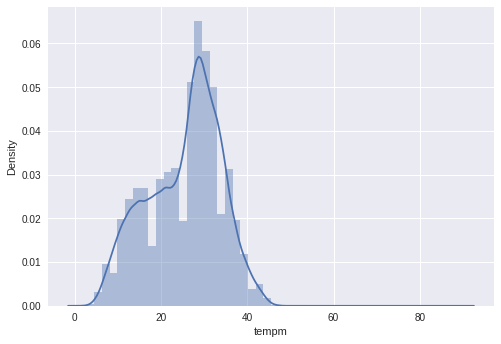

In [ ]:
sns.distplot(df_weather['tempm'], bins=50)
plt.show()

In [ ]:
bike=df_weather[['datetimeutc','tempm']].copy()
bike['datetimeutc'] = pd.to_datetime(bike['datetimeutc'])

bike.set_index('datetimeutc', inplace= True)
bike.head()

,tempm
datetimeutc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


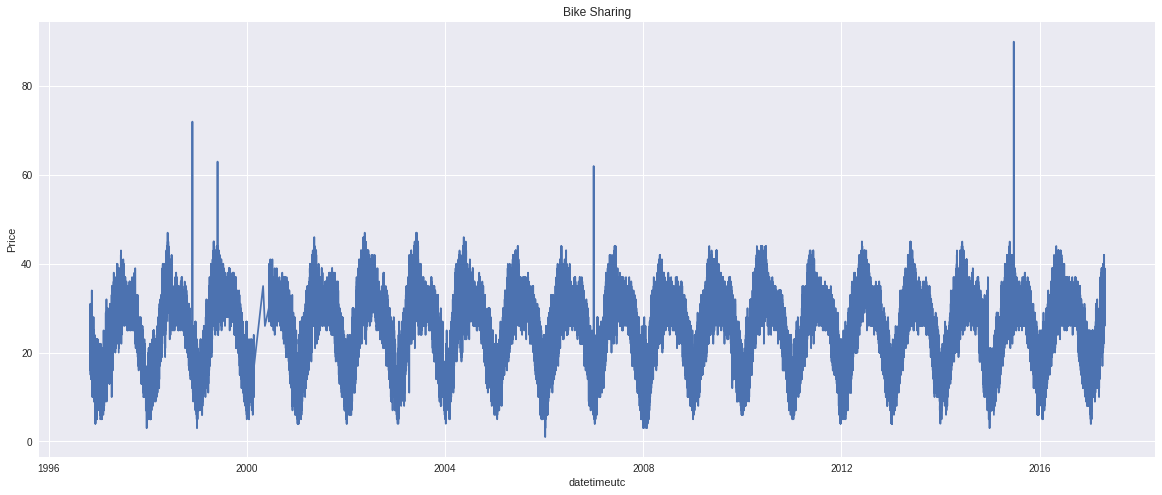

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bike)
plt.title('Bike Sharing')
plt.xlabel('datetimeutc')
plt.ylabel('Price')
plt.show()

Dapat dilihat pada data terdapat outliers

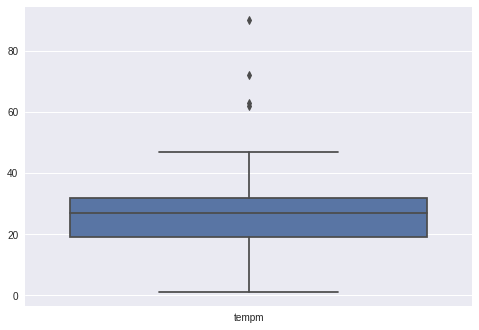

In [ ]:
sns.boxplot(data=df_weather[['datetimeutc', 'tempm']])
plt.show()

# **Data Preprocessing**

Pada dataset, column yang diperlukan hanya `datetimeutc` dan `tempm`

In [ ]:
df_weather.head(3)

,datetimeutc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [ ]:
df_weather=df_weather[['datetimeutc', 'tempm']]

In [ ]:
df_weather.head()

,datetimeutc,tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


Mengubah format `datetimeutc`

In [ ]:
df_weather['datetimeutc'] = pd.to_datetime(df_weather['datetimeutc']).dt.strftime('%Y-%m-%d %H:%M')
df_weather.sort_values('datetimeutc', inplace=True, ignore_index=True)
df_weather.head()

,datetimeutc,tempm
0,1996-11-01 11:00,30.0
1,1996-11-01 12:00,28.0
2,1996-11-01 13:00,24.0
3,1996-11-01 14:00,24.0
4,1996-11-01 16:00,23.0


**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value.

Dapat dilihat pada terdapat missing value pada tempm. Maka diputuskan untuk mengisi atau mengganti nilai nya dengan rata-rata dari tempm.

In [ ]:
df_weather.isnull().any()

datetimeutc    False
tempm           True
dtype: bool

In [ ]:
df_weather.isna().any()

datetimeutc    False
tempm           True
dtype: bool

In [ ]:
df_weather['tempm'].fillna(df_weather['tempm'].mean(), inplace=True)

**Outlier Analysis**

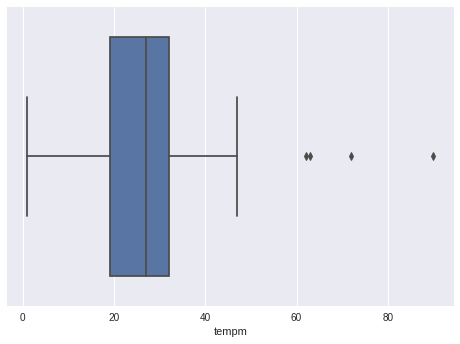

In [ ]:
sns.boxplot(x=df_weather['tempm'])

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
Q1 = df_weather.quantile(0.25)
Q3 = df_weather.quantile(0.75)
print(Q1)
print(Q3)

tempm    19.0
Name: 0.25, dtype: float64
tempm    32.0
Name: 0.75, dtype: float64


In [ ]:
IQR = Q3 - Q1
print(IQR)

tempm    13.0
dtype: float64


In [ ]:
outlier = (df_weather < (Q1-1.5*IQR)) | (df_weather > (Q3+1.5*IQR))
pd.set_option('display.max_rows', outlier.shape[0]+1)
outlier[outlier['tempm'] == True]

,datetimeutc,tempm
11084,False,True
12951,False,True
68077,False,True
91391,False,True


In [ ]:
df_weather_out = df_weather[~((df_weather < (Q1-1.5*IQR))|(df_weather>(Q3+1.5*IQR))).any(axis=1)]
df_weather_out.shape

(100986, 2)

**Scaling / Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mx = MinMaxScaler()

In [ ]:
df_weather['tempm'] = mx.fit_transform(df_weather[['tempm']])
df_weather.head()

,datetimeutc,tempm
0,1996-11-01 11:00,0.325843
1,1996-11-01 12:00,0.303371
2,1996-11-01 13:00,0.258427
3,1996-11-01 14:00,0.258427
4,1996-11-01 16:00,0.247191


**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

In [ ]:
dates = df_weather['datetimeutc'].values
weather = df_weather['tempm'].values

In [ ]:
dates

array(['1996-11-01 11:00', '1996-11-01 12:00', '1996-11-01 13:00', ...,
       '2017-04-24 12:00', '2017-04-24 15:00', '2017-04-24 18:00'],
      dtype=object)

In [ ]:
weather

array([0.3258427 , 0.30337079, 0.25842697, ..., 0.39325843, 0.34831461,
       0.3258427 ])

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dates, weather, test_size = 0.2, random_state = 0 , shuffle=False)

In [ ]:
print(len(x_train), len(x_test))

80792 20198


In [ ]:
x_train.shape

(80792,)

In [ ]:
x_train

array(['1996-11-01 11:00', '1996-11-01 12:00', '1996-11-01 13:00', ...,
       '2011-06-25 18:00', '2011-06-25 21:00', '2011-06-26 00:00'],
      dtype=object)

**Windowed**

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
data_x_train = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(y_test, window_size=60, batch_size=100, shuffle_buffer=5000)

# **Data Modelling**

In [ ]:
from keras.layers import Dense, LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu', input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

Dengan memilih 10% dari scala data, pada mse

In [ ]:
max = df_weather['tempm'].max()
print('Max value : ' )
print(max)

Max value : 
1.0


In [ ]:
min = df_weather['tempm'].min()
print('Min Value : ')
print(min)

Min Value : 
0.0


In [ ]:
x = (max - min) * 0.1
print(x)

0.1


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < x and logs.get('val_mae') < x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(
    data_x_train,
    epochs=100,  
    validation_data=(data_x_test), 
    verbose=2, 
    callbacks=[callbacks]
)

Epoch 1/100
808/808 - 114s - loss: 0.0115 - mae: 0.1248 - val_loss: 0.0039 - val_mae: 0.0745
Epoch 2/100
808/808 - 109s - loss: 0.0039 - mae: 0.0734 - val_loss: 0.0037 - val_mae: 0.0712

MAE of the model < 10% of data scale


**Plot Loss dan MAE**

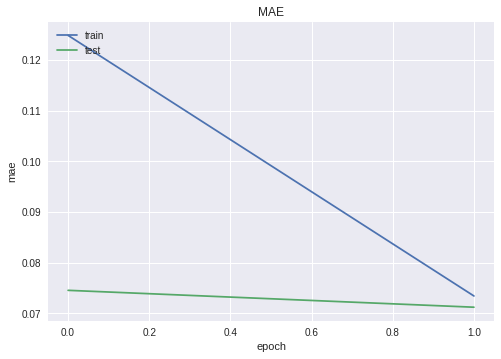

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

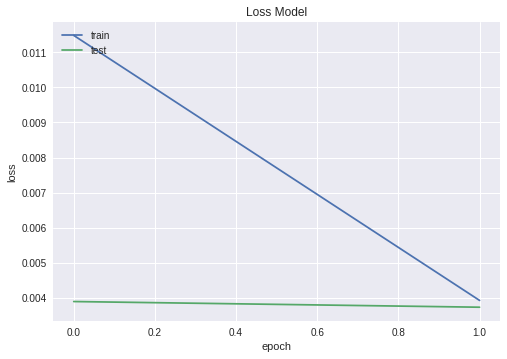

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
train_predict = model.predict(data_x_train)
test_predict = model.predict(data_x_test)

https://www.inblog.in/Stock-Market-Prediction-And-Forecasting-Using-Stacked-LSTM-fyCUr1wyAO

In [ ]:
# look_back=4
# trainPredictPlot = np.empty_like(df_weather)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# # Shift test predictions for plotting
# testPredictPlot = np.empty_like(df_weather)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(test_predict)+(look_back*2)+1:len(df_weather)-1, :] = test_predict
# # Plot baseline and predictions
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.title("X")
# plt.plot(scaler.inverse_transform(df_weather))
# plt.plot(testPredictPlot)
# plt.show()